<a href="https://colab.research.google.com/github/edanbave94/Deep_Learning/blob/main/01_exploraci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from itertools import islice
dataset_p = pd.read_csv("https://raw.githubusercontent.com/edanbave94/Deep_Learning/refs/heads/main/HVAC%20Energy%20Data.csv")


In [35]:
print(dataset_p.head())

  Local Time (Timezone : GMT+8h)  Chilled Water Rate (L/sec)  \
0                 8/18/2019 0:00                        85.6   
1                 8/18/2019 0:30                        84.3   
2                 8/18/2019 1:00                        84.6   
3                 8/18/2019 1:30                        84.8   
4                 8/18/2019 2:00                        84.7   

   Cooling Water Temperature (C)  Building Load (RT)  \
0                           31.4               479.6   
1                           31.1               460.3   
2                           31.3               462.4   
3                           31.4               458.5   
4                           31.4               455.4   

   Chiller Energy Consumption (kWh)  Outside Temperature (F)  Dew Point (F)  \
0                             116.2                       82             75   
1                             114.5                       82             75   
2                             116.8      

In [36]:
if not pd.api.types.is_datetime64_any_dtype(dataset_p['Local Time (Timezone : GMT+8h)']):
    dataset_p['Local Time (Timezone : GMT+8h)'] = pd.to_datetime(dataset_p['Local Time (Timezone : GMT+8h)'])

print(dataset_p['Local Time (Timezone : GMT+8h)'].head())

0   2019-08-18 00:00:00
1   2019-08-18 00:30:00
2   2019-08-18 01:00:00
3   2019-08-18 01:30:00
4   2019-08-18 02:00:00
Name: Local Time (Timezone : GMT+8h), dtype: datetime64[ns]


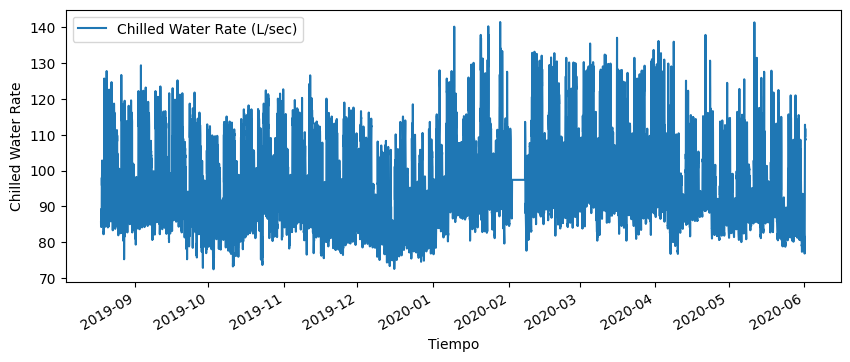

In [37]:
dataset_p.plot(x='Local Time (Timezone : GMT+8h)', y='Chilled Water Rate (L/sec)', figsize=(10,4))
plt.ylabel('Chilled Water Rate')
plt.xlabel('Tiempo')
plt.show()

In [5]:
dataset_p.shape

(13615, 10)

In [43]:
dataset_p['Local Time (Timezone : GMT+8h)'] = pd.to_datetime(dataset_p['Local Time (Timezone : GMT+8h)'])
dataset_p['Date'] = dataset_p['Local Time (Timezone : GMT+8h)'].dt.date
dataset_p['Hour'] = dataset_p['Local Time (Timezone : GMT+8h)'].dt.time

if 'Date' in dataset_p.columns and 'Hour' in dataset_p.columns:
    columnas_ordenadas = ['Date', 'Hour'] + [col for col in dataset_p.columns if col not in ['Date', 'Hour','Local Time (Timezone : GMT+8h)']]
    dataset = dataset[columnas_ordenadas]

days_group = {day: group for day, group in dataset.groupby('Date')}

In [45]:
dia_seleccionado = '2019-08-19'
dia_seleccionado = datetime.strptime(dia_seleccionado, '%Y-%m-%d').date()

datos_dia = days_group[dia_seleccionado]
print(f"Datos del día {dia_seleccionado}:")
print(datos_dia.head())  # Mostrar primeras filas del día seleccionado



Datos del día 2019-08-19:
          Date      Hour  Chilled Water Rate (L/sec)  \
48  2019-08-19  00:00:00                        89.3   
49  2019-08-19  00:30:00                        82.2   
50  2019-08-19  01:00:00                        83.0   
51  2019-08-19  01:30:00                        82.9   
52  2019-08-19  02:00:00                        82.7   

    Cooling Water Temperature (C)  Building Load (RT)  \
48                           30.9               481.5   
49                           30.1               429.2   
50                           30.4               435.5   
51                           30.5               434.0   
52                           30.4               428.2   

    Chiller Energy Consumption (kWh)  Outside Temperature (F)  Dew Point (F)  \
48                             110.0                       82             73   
49                             104.5                       82             73   
50                             106.9                  

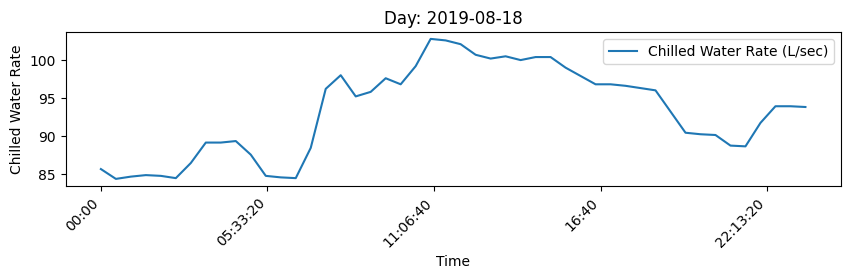

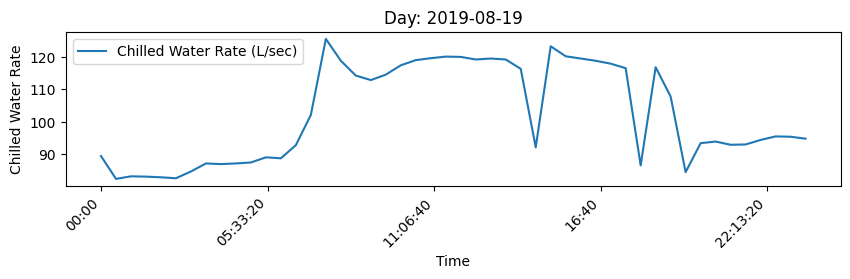

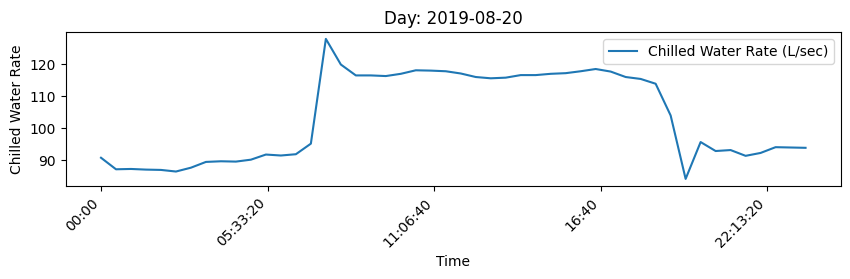

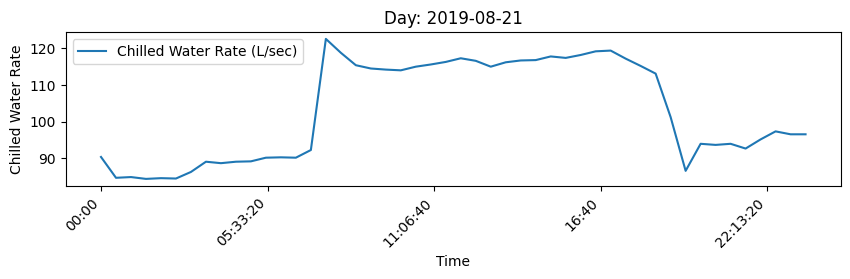

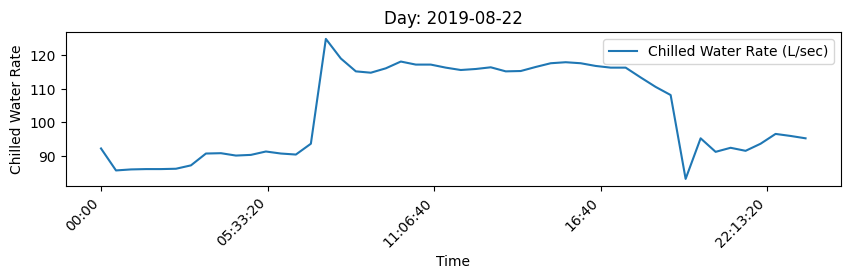

In [53]:
for day, subset in islice(days_group.items(), 5):
    datos_dia = days_group[day]
    datos_dia.plot(x='Hour', y='Chilled Water Rate (L/sec)', figsize=(10,2))
    plt.ylabel('Chilled Water Rate')
    plt.xlabel('Time')
    plt.title(f'Day: {day}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

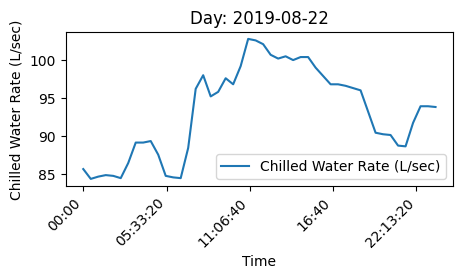

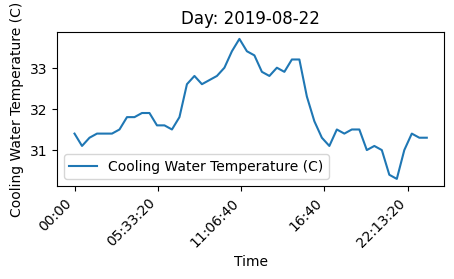

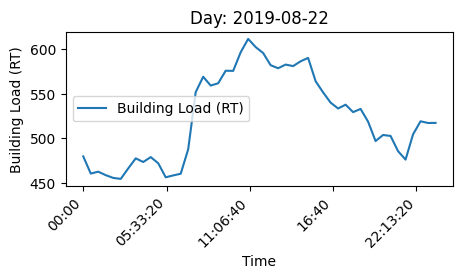

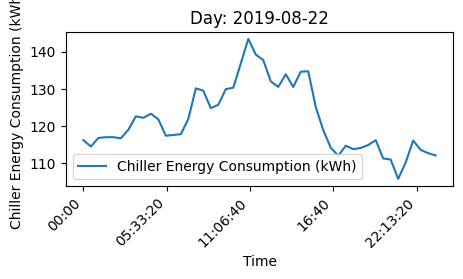

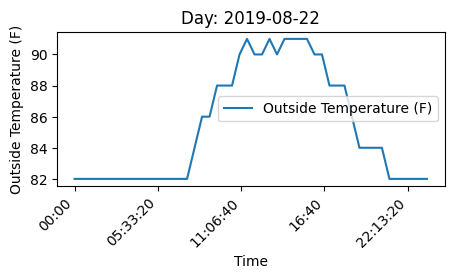

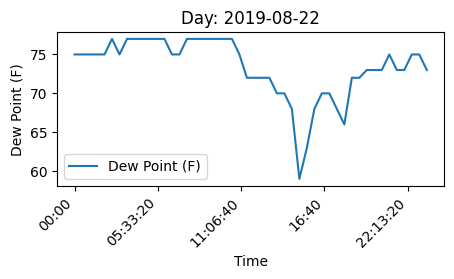

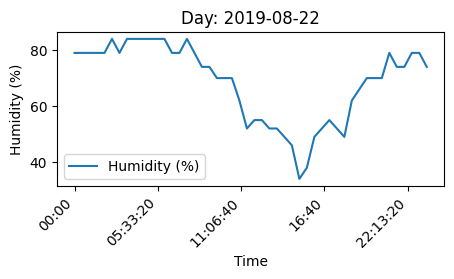

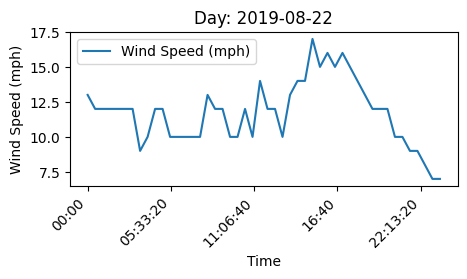

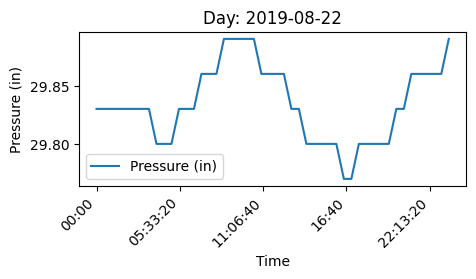

In [55]:
dia_seleccionado = '2019-08-18'
dia_seleccionado = datetime.strptime(dia_seleccionado, '%Y-%m-%d').date()
datos_dia = days_group[dia_seleccionado]

for columna in datos_dia.columns:
    if columna != 'Hour' and columna != 'Date':
      datos_dia.plot(x='Hour', y=columna, figsize=(5,2))
      plt.ylabel(columna)
      plt.xlabel('Time')
      plt.title(f'Day: {day}')
      plt.xticks(rotation=45, ha='right')
      plt.show()